# Third Year Project 2023-24 Experiments
#### Murtaza Daudali

## Set-up
Before compiling this notebook, please ensure you have all pre-requisite packages installed, this can be done by running:

`pip install -r requirements.txt`

In [1]:
from generators import DirectionalProblemReducedMazeProblemGenerator, SnakeProblemGenerator, NonDirectionalProblemReducedMazeProblemGenerator
%matplotlib inline

pygame 2.5.2 (SDL 2.28.2, Python 3.11.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


[DEBUG] snake environment generated successfully
[DEBUG] problem added


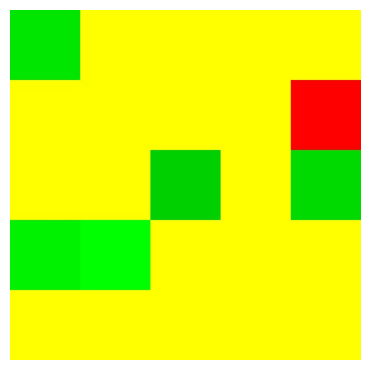

In [2]:
snake_generator = SnakeProblemGenerator(problem_count=1, auto=True)
snake_generator.display_images()

In [3]:
snake_generator.display_problems()
# snake_generator.save_as_pddl() #TODO: FIX (not creating file)

Problem 0:
problem name = snake0

types = [position]

fluents = [
  bool path[x=position, y=position]
  bool head-at[x=position]
  bool tail-at[x=position]
  bool body-con[x=position, y=position]
  bool blocked[x=position]
  bool apple-at[x=position]
  bool spawn-apple[x=position]
  bool next-apple[x=position, y=position]
]

actions = [
  action move(position head, position newhead, position tail, position newtail) {
    preconditions = [
      (head-at(head) and path(head, newhead) and tail-at(tail) and body-con(newtail, tail) and (not blocked(newhead)) and (not apple-at(newhead)))
    ]
    effects = [
      blocked(newhead) := true
      head-at(newhead) := true
      body-con(newhead, head) := true
      head-at(head) := false
      blocked(tail) := false
      tail-at(tail) := false
      body-con(newtail, tail) := false
      tail-at(newtail) := true
    ]
  }
  action move-and-eat(position head, position newhead, position spawn, position nextspawn) {
    preconditions = [
      

In [4]:
snake_generator.solve_each()

Plan 1:
Status: PlanGenerationResultStatus.SOLVED_SATISFICING
Found plan with 17 steps!
0: move(p4-1, p3-1, p4-2, p4-1)
1: move(p3-1, p2-1, p4-1, p3-1)
2: move(p2-1, p2-2, p3-1, p2-1)
3: move(p2-2, p1-2, p2-1, p2-2)
4: move-and-eat(p1-2, p1-3, p0-3, p0-0)
5: move-and-eat(p1-3, p0-3, p0-0, p4-2)
6: move(p0-3, p0-2, p2-2, p1-2)
7: move(p0-2, p0-1, p1-2, p1-3)
8: move-and-eat(p0-1, p0-0, p4-2, p2-2)
9: move(p0-0, p1-0, p1-3, p0-3)
10: move(p1-0, p2-0, p0-3, p0-2)
11: move(p2-0, p3-0, p0-2, p0-1)
12: move(p3-0, p3-1, p0-1, p0-0)
13: move(p3-1, p4-1, p0-0, p1-0)
14: move-and-eat(p4-1, p4-2, p2-2, dummypoint)
15: move(p4-2, p3-2, p1-0, p2-0)
16: move-and-eat-no-spawn(p3-2, p2-2)



True

[DEBUG] reduced_maze environment generated successfully
[DEBUG] problem added


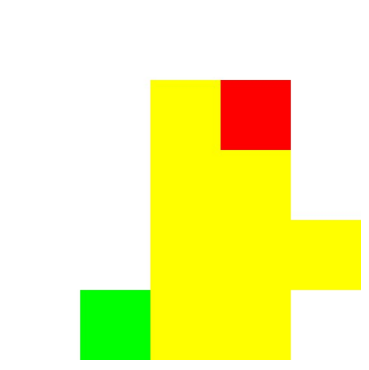

In [5]:
psp_generator = DirectionalProblemReducedMazeProblemGenerator(problem_count=1, auto=True)
psp_generator.display_images()

In [6]:
psp_generator.display_problems()
# psp_generator.save_as_pddl()
psp_generator.solve_each()

Problem 0:
problem name = reduced_maze0

types = [position]

fluents = [
  bool path[a=position, b=position]
  bool at[x=position]
]

actions = [
  action move(position x, position xn) {
    preconditions = [
      (at(x) and path(x, xn))
    ]
    effects = [
      at(xn) := true
      at(x) := false
    ]
  }
]

objects = [
  position: [start, goal, d0, d1, u2, l3, u4, d5, d6, u7, r8, d7, u10, r11, d12, u13, l14, r14, l16, l13, r19, r20, l0]
]

initial fluents default = [
  bool path[a=position, b=position] := false
  bool at[x=position] := false
]

initial values = [
  at(start) := true
  path(start, d0) := true
  path(d0, start) := true
  path(d0, d1) := true
  path(d1, u2) := true
  path(u2, start) := true
  path(u2, d1) := true
  path(u2, l3) := true
  path(l3, u4) := true
  path(u4, d5) := true
  path(d5, u4) := true
  path(d5, d6) := true
  path(d6, u7) := true
  path(u7, u4) := true
  path(u7, d6) := true
  path(u7, r8) := true
  path(r8, start) := true
  path(r8, d1) := true


True

### Multiple problems using Generalised Planning

[DEBUG] snake environment generated successfully
[DEBUG] problem added
Plan 1:
Status: PlanGenerationResultStatus.SOLVED_SATISFICING
Found plan with 23 steps!
0: move(p0-4, p0-3, p1-4, p0-4)
1: move(p0-3, p1-3, p0-4, p0-3)
2: move(p1-3, p2-3, p0-3, p1-3)
3: move-and-eat(p2-3, p3-3, p2-0, p1-0)
4: move(p3-3, p3-2, p1-3, p2-3)
5: move(p3-2, p3-1, p2-3, p3-3)
6: move(p3-1, p2-1, p3-3, p3-2)
7: move-and-eat(p2-1, p2-0, p1-0, p3-0)
8: move-and-eat(p2-0, p1-0, p3-0, p1-4)
9: move(p1-0, p0-0, p3-2, p3-1)
10: move(p0-0, p0-1, p3-1, p2-1)
11: move(p0-1, p1-1, p2-1, p2-0)
12: move(p1-1, p2-1, p2-0, p1-0)
13: move(p2-1, p3-1, p1-0, p0-0)
14: move-and-eat(p3-1, p3-0, p1-4, dummypoint)
15: move(p3-0, p4-0, p0-0, p0-1)
16: move(p4-0, p4-1, p0-1, p1-1)
17: move(p4-1, p4-2, p1-1, p2-1)
18: move(p4-2, p3-2, p2-1, p3-1)
19: move(p3-2, p3-3, p3-1, p3-0)
20: move(p3-3, p2-3, p3-0, p4-0)
21: move(p2-3, p2-4, p4-0, p4-1)
22: move-and-eat-no-spawn(p2-4, p1-4)



True

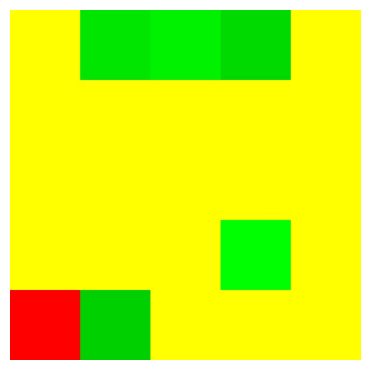

In [7]:
snake_generator = SnakeProblemGenerator(problem_count=1, auto=True)
snake_generator.display_images()
snake_generator.solve_each()

[DEBUG] reduced_maze environment generated successfully
[DEBUG] problem added
[DEBUG] reduced_maze environment generated successfully
[DEBUG] problem added
[DEBUG] reduced_maze environment generated successfully
[DEBUG] problem added


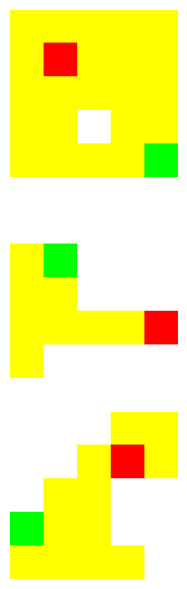

In [8]:
psp_generator = DirectionalProblemReducedMazeProblemGenerator(problem_count=3, auto=True)
psp_generator.display_images()

In [9]:
psp_generator.solve_each()

Plan 1:
Status: PlanGenerationResultStatus.SOLVED_SATISFICING
Found plan with 6 steps!
0: move(start, d0)
1: move(d0, d28)
2: move(d28, d54)
3: move(d54, r59)
4: move(r59, r60)
5: move(r60, goal)

Plan 2:
Status: PlanGenerationResultStatus.SOLVED_SATISFICING
Found plan with 5 steps!
0: move(start, l0)
1: move(l0, l1)
2: move(l1, l2)
3: move(l2, u3)
4: move(u3, goal)

Plan 3:
Status: PlanGenerationResultStatus.SOLVED_SATISFICING
Found plan with 5 steps!
0: move(start, l0)
1: move(l0, d6)
2: move(d6, d7)
3: move(d7, l22)
4: move(l22, goal)



True

[DEBUG] reduced_maze environment generated successfully
[DEBUG] problem added
[DEBUG] reduced_maze environment generated successfully
[DEBUG] problem added


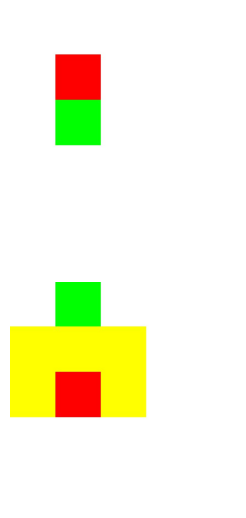

In [10]:
psp_generator = NonDirectionalProblemReducedMazeProblemGenerator(problem_count=2, auto=True)
psp_generator.display_images()

In [11]:
psp_generator.solve_each()

Plan 1:
Status: PlanGenerationResultStatus.SOLVED_SATISFICING
Found plan with 1 steps!
0: move(p1-1, p1-2)

Plan 2:
Status: PlanGenerationResultStatus.SOLVED_SATISFICING
Found plan with 2 steps!
0: move(p1-2, p1-1)
1: move(p1-1, p1-0)



True

In [13]:
from experiments import tile_size_experiment_classical

tile_size_experiment_classical(NonDirectionalProblemReducedMazeProblemGenerator)

[DEBUG] reduced_maze environment generated successfully
[DEBUG] problem added
Plan 1:
Status: PlanGenerationResultStatus.SOLVED_SATISFICING
Found plan with 1 steps!
0: move(p0-1, p1-1)

[DEBUG] reduced_maze environment generated successfully
[DEBUG] problem added
Plan 1:
Status: PlanGenerationResultStatus.SOLVED_SATISFICING
Found plan with 3 steps!
0: move(p0-0, p0-1)
1: move(p0-1, p1-1)
2: move(p1-1, p1-2)

[DEBUG] reduced_maze environment generated successfully
[DEBUG] problem added
Plan 1:
Status: PlanGenerationResultStatus.SOLVED_SATISFICING
Found plan with 4 steps!
0: move(p3-3, p2-3)
1: move(p2-3, p2-2)
2: move(p2-2, p1-2)
3: move(p1-2, p1-1)

[DEBUG] reduced_maze environment generated successfully
[DEBUG] problem added
Plan 1:
Status: PlanGenerationResultStatus.SOLVED_SATISFICING
Found plan with 3 steps!
0: move(p2-2, p1-2)
1: move(p1-2, p1-3)
2: move(p1-3, p0-3)

[DEBUG] reduced_maze environment generated successfully
[DEBUG] problem added
Plan 1:
Status: PlanGenerationResultSt

KeyboardInterrupt: 